# 5. Interpolation

In [5]:
from math import *
import numpy as np
from matplotlib import pyplot as plt

## 5.1 Polynominterpolation

### Algorithmus 5.2: Horner-Schema

In [6]:
def horner(x, xs, c):
    """Berechnet den Wert des Interpolationspolynoms P_n an der Stelle x 
    für die Stützstellen xs und die Koeffizienten der Newton-Darstellung c."""
    n = len(c) - 1
    if len(xs) < n:
        raise Exception("Zu wenige Stützstellen!")
    p = c[n]
    for k in range(n-1, -1, -1):
        p = c[k] + (x - xs[k])*p
    return p 

Beispiel: 

$P_n(x) = 1 + 2x + 3x(x-1) + 4x(x-1)(x-3) = 4x^3 - 13x^2 + 11x + 1$

Faktoren: $c=[1,2,3,4]$

Stützstellen: $x_s=[0,1,3]$

Berechne $P_n(2)$:

In [7]:
x = 2
P1 = 1 + 2*x + 3*x*(x-1) + 4*x*(x-1)*(x-3)
print("Direkt eingesetzt: {}".format(P1))
P2 = 4*x**3 - 13*x**2 + 11*x + 1
print("Ausmultipliziert: {}".format(P2))
P3 = 1 + x*(2 + (x-1)*(3 + (x-3)*4))
print("Horner per Hand: {}".format(P3))
P4 = horner(x, [0, 1, 3], [1, 2, 3, 4])
print("Horner mit Funktion: {}".format(P4))

Direkt eingesetzt: 3
Ausmultipliziert: 3
Horner per Hand: 3
Horner mit Funktion: 3


### Algorithmus 5.6: Koeffizienten der Newton-Interpolation

In [8]:
def newton_coeffs(xs, ys):
    """Berechnet die Koeffizienten c des Interpolationspolynoms in 
    Newton-Darstellung für die Stützstellen xs und Werte ys."""
    n = len(xs) - 1
    if not len(ys) == n+1:
        raise Exception("""Brauche genauso viele Stützstellen wie Werte!""")
    c = 1.*ys
    for k in range(1, n+1):
        for i in range(n, k-1, -1):
            c[i] = (c[i] - c[i-1])/(xs[i] - xs[i-k])
    return c

Beispiel

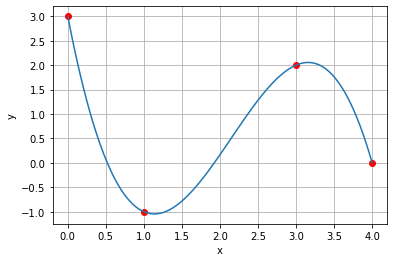

In [9]:
#Wähle Daten
xs = np.array([0, 1, 3, 4])
ys = np.array([3, -1, 2, 0])
#Bestimme Koeffizienten des Interpolationspolynoms in Newton-Darstellung
c = newton_coeffs(xs, ys)
#Werte Interpolationspolynom auf x mithilfe von Horner-Schema aus
x = np.linspace(0, 4, 100)
y = horner(x, xs, c)
#Plotte Daten und Interpolationspolynom
plt.plot(xs, ys, 'ro')
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()